In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0
tensorboard2.1.0
seaborn0.10.1
Num GPUs Available:  0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15480901016094393788]

In [2]:
data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')

os.listdir(test_path)

['cats', 'dogs']

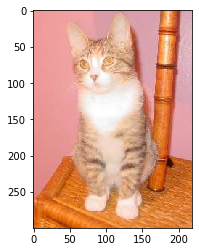

In [3]:
cat_image = test_path + '/cats/' + os.listdir(test_path + '/cats')[6]
imread(cat_image).shape
plt.imshow(imread(cat_image))

In [4]:
image_shape =(300, 300, 3)
test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary',  shuffle=False)
test_image_gen.class_indices

Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [5]:
# help(test_gen.flow_from_directory)

In [6]:
model =tf.keras.models.load_model('catsdogs')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
[0.6773739126205445, 0.5982092266082764, 0.5369308289051056, 0.49721043915748603, 0.4673807229995727, 0.4427423375368118, 0.4242748087644577, 0.4062017357826233, 0.39387915852069855, 0.3811830951452255, 0.3734685912847519, 0.3609814774274826, 0.3533108571529389, 0.3432192801713944, 0.3349912717819214, 0.33089332101345065, 0.32143005023002624, 0.3165169503569603, 0.3075870411396027, 0.3033384872913361, 0.2995713583230972, 0.290740448653698, 0.27978656511306765, 0.2746343347549439, 0.27728338783979417, 0.27028172906637193, 0.2681638311862945, 0.2575760325670242, 0.2515538825392723, 0.24919516099095346, 0.24701100215911864, 0.2390991036534309, 0.24111159519553185, 0.2316838778913021, 0.2339426237344742, 0.2244129252314568, 0.22179310542941091, 0.21844381147623065, 0.21558514132499693, 0.21113117790818212, 0.206767913126

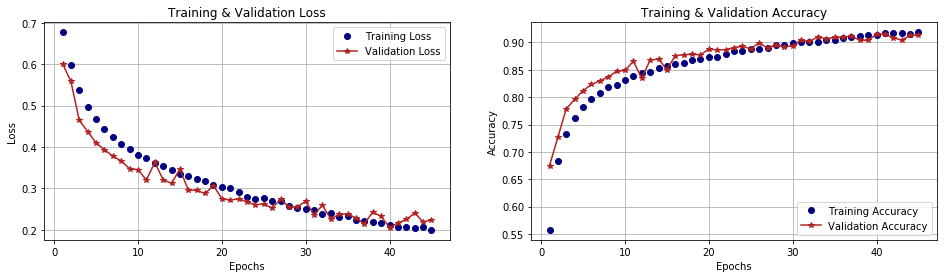

In [7]:
history = pd.read_csv("history_catsdogs.csv")
history_dict = history.to_dict('list')
kr.show_plots(history_dict)

In [8]:
pred = model.predict(test_image_gen)

In [9]:
predictions = pred > 0.5
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions, target_names=test_image_gen.class_indices))

              precision    recall  f1-score   support

        cats       0.93      0.90      0.91      2500
        dogs       0.90      0.93      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [10]:
pred

array([[1.9731311e-04],
       [2.0525565e-03],
       [1.6592268e-02],
       ...,
       [9.0971059e-01],
       [9.9999988e-01],
       [8.4369910e-01]], dtype=float32)

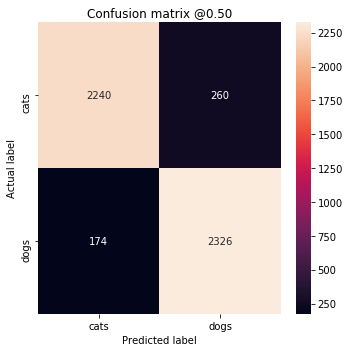

In [11]:

kr.plot_cm(test_image_gen.classes, predictions, test_image_gen.class_indices, 0.5)

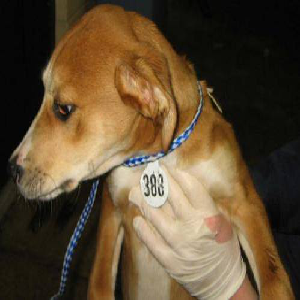

In [12]:
from tensorflow.keras.preprocessing import image
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[5]
# plt.imshow(imread(dog_image))
my_image = image.load_img(dog_image_path, target_size=image_shape)
my_image

In [13]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

(1, 300, 300, 3)

In [14]:
model.predict(my_img_arr)

array([[1.]], dtype=float32)

In [15]:
model.input.shape

TensorShape([None, 300, 300, 3])

In [16]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (4, 4, 3, 32)
conv2d_1 (4, 4, 32, 32)
conv2d_2 (4, 4, 32, 64)


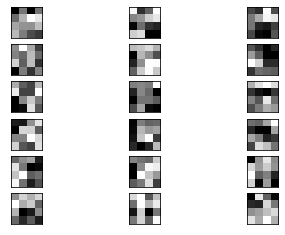

In [17]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

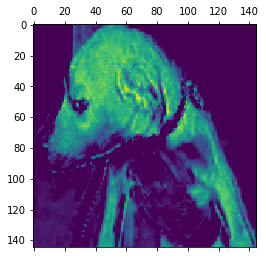

In [18]:
from tensorflow.keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.inputs, outputs=model.layers[2].output)

# returns a list of Numpy arrays: one array per layer activation
feature_maps  = activation_model.predict(my_img_arr)

# activation of the 1st convolution layer
first_layer_activation = feature_maps[0]

# # display the 4th channel of the activation of the 1st layer of the original model
plt.matshow(feature_maps[0, :, :, 1], cmap='viridis')

In [19]:
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
Total params: 17,984
Trainable params: 17,984
Non-trainable params: 0
_________________________________________________________________


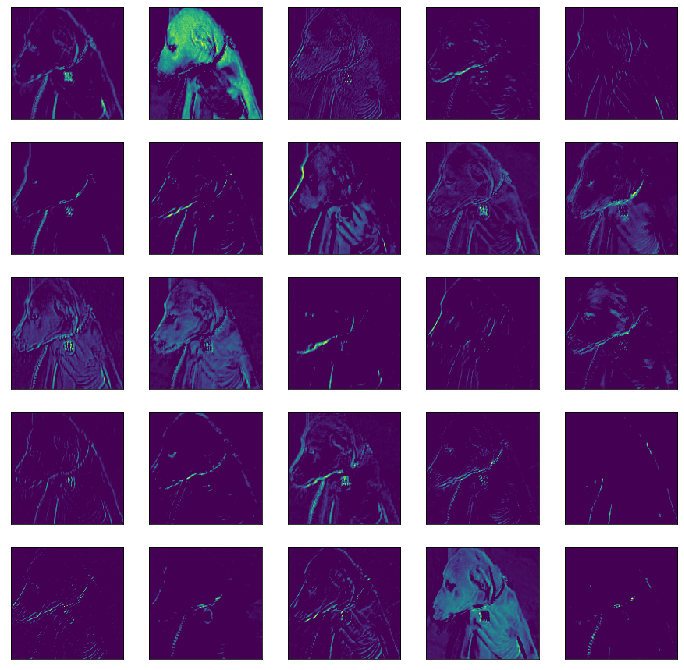

In [20]:

# plot all 64 maps in an 8x8 squares
square = 5
ix = 1
plt.figure(figsize=(12,12))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure

plt.show()

In [21]:
from keras.applications.imagenet_utils import decode_predictions 
resnet = tf.keras.applications.ResNet152()


Using TensorFlow backend.


[[('n02093647', 'Bedlington_terrier', 0.233578), ('n02091831', 'Saluki', 0.16632774), ('n03958227', 'plastic_bag', 0.11871456), ('n02088094', 'Afghan_hound', 0.07882983), ('n03803284', 'muzzle', 0.0651534)]]
Predicted: Bedlington_terrier


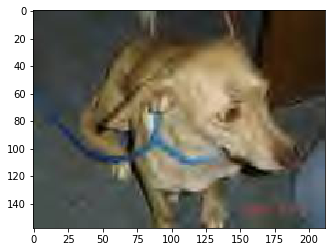

In [89]:
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[2000]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=(224, 224, 3))
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)
sample_img_arr = np.expand_dims(sample_img_arr, axis =0)
predictions = resnet.predict(sample_img_arr)
print(decode_predictions(predictions))
print('Predicted:', decode_predictions(predictions, top=3)[0][0][1])

In [35]:
print(predictions)

[[1.31088552e-06 2.02842784e-05 2.63531689e-07 8.84404756e-07
  1.14590222e-07 1.97090892e-04 9.05055856e-07 2.55432860e-06
  9.20871116e-07 2.44570925e-04 1.36521136e-04 5.72779527e-07
  5.36489154e-07 1.87030389e-06 1.27629301e-06 3.07947471e-06
  2.25579970e-06 4.78077800e-06 2.14058218e-07 4.49279560e-06
  4.52934870e-07 4.17939555e-06 8.01563189e-08 1.15331786e-05
  4.68231519e-07 7.19435391e-08 3.06849006e-06 4.38375281e-07
  2.89433530e-07 6.12335589e-06 8.48768238e-08 2.19947225e-07
  2.64635241e-06 8.49729247e-07 6.19400339e-07 1.41157273e-07
  1.44515907e-05 5.02298541e-08 7.83641190e-06 1.86293425e-06
  3.34194340e-07 2.57919237e-05 3.24966845e-06 6.84170576e-04
  5.78567096e-07 1.72453201e-06 1.05697723e-07 1.08956367e-04
  3.20833101e-06 5.97647102e-07 2.64405486e-07 1.13521069e-02
  7.26424446e-07 9.32901514e-07 4.67175960e-06 9.83856197e-08
  4.80391691e-08 3.23778238e-07 9.40328064e-08 1.32225192e-04
  3.38078010e-08 4.35286267e-07 7.99263289e-05 6.23818778e-06
  7.3793

In [25]:
sum(predictions[0])

0.9999999714910996

In [ ]:
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[2000]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=(224, 224, 3))
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)

import lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

# from lime.wrappers.scikit_image import SegmentationAlgorithm
# segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

# This method only requires the image to explain and the model's predict function, which is what allows it to be model-agnostic
explanation = explainer.explain_instance(sample_img_arr, resnet.predict)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


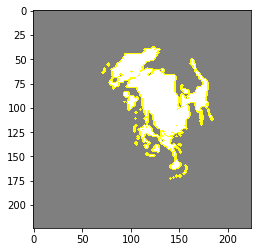

In [119]:
from skimage.segmentation import mark_boundaries
# Get image and mask shows us the superpixels that the model found to be
# most relevant to making a prediction
# The argument with the value of 1 in this method is the class that we want LIME to explain
# temp, mask = explanation.get_image_and_mask(0, positive_only=True, hide_rest=True, num_features = 5)
temp, mask = explanation.get_image_and_mask( explanation.top_labels[0] , positive_only=True, 
                                            negative_only=False, hide_rest=True, num_features = 5, min_weight=0.0)

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


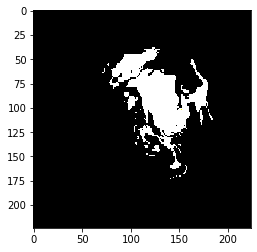

In [120]:
plt.imshow(temp)

In [102]:
help(explainer.explain_instance)

Help on method explain_instance in module lime.lime_image:

explain_instance(image, classifier_fn, labels=(1,), hide_color=None, top_labels=5, num_features=100000, num_samples=1000, batch_size=10, segmentation_fn=None, distance_metric='cosine', model_regressor=None, random_seed=None) method of lime.lime_image.LimeImageExplainer instance
    Generates explanations for a prediction.
    
    First, we generate neighborhood data by randomly perturbing features
    from the instance (see __data_inverse). We then learn locally weighted
    linear models on this neighborhood data to explain each of the classes
    in an interpretable way (see lime_base.py).
    
    Args:
        image: 3 dimension RGB image. If this is only two dimensional,
            we will assume it's a grayscale image and call gray2rgb.
        classifier_fn: classifier prediction probability function, which
            takes a numpy array and outputs prediction probabilities.  For
            ScikitClassifiers , this 

In [106]:
explanation.top_labels[0]

181